# Лабораторная работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 9304 Цаплин Илья и Силкин Владислав. Вариант №11

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования. 

## Основные теоретические положения
Рекурсивная формула для метода правых прямоугольников:
$$y_{n+1}=y_n+x_{n+1}$$
Рекурсивная формула для метода трапеций:
$$y_{n+1}=y_n+\frac{1}{2}[x_{n+1}+x_n]$$
Рекурсивная формула Симпсона:
$$y_{n+1}=y_{n-1}+\frac{1}{3}[x_{n+1} + 4x_n + 4_{n-1}]$$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde{H}(f)$.  
Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

1. Проведём анализ частотных характеристик известных формул численного интегрирования

1.1. Выведем формулу передаточной функций рекурсивного фильтра, соответствующего квадратурной формуле трапеций.  
Формула трапеций:
$$y_{n+1}=y_n+\frac{1}{2}[x_{n+1}+x_n]$$
Выразим $y$ через передаточную функцию $A(\omega)$, возьмём $x_n = e^{i\omega t}$:
$$A(\omega) \cdot e^{i \omega (t+1)} = A(\omega) \cdot e^{i\omega t} + \frac{1}{2}(e^{i \omega (t+1)} + e^{i\omega t})$$
Получим:
$$A(\omega) = \frac{1}{2} \frac{e^{i \omega} + 1}{e^{i \omega} - 1} = \frac{cos(\omega/2)}{2i sin(\omega/2)}$$
Отношение вычисленного значения к истинному равно:
$$\frac{A(\omega) \cdot e^{i \omega t}}{\frac{e^{i \omega t}}{i \omega}} = A(\omega) \cdot i \omega$$
Для данной передаточной функции получим:
$$A(\omega) \cdot i \omega = \frac{\omega \cdot cos(\omega / 2)}{2 sin(\omega/2)}$$

In [66]:
import numpy as np
from matplotlib import pyplot as plt


# Функция отрисовки
def plot_func(func, label=None, stop=0.5):
    frequencies = np.arange(0.001, stop + 0.001, 0.001)
    values = [np.absolute(func(f * 2 * np.pi)) for f in frequencies]
    plt.xlabel("f")
    plt.plot(frequencies, values, label=label)
    plt.legend()
    plt.xlim(0, stop)

# Входной сигнал
def f(t, omega):
    return np.exp(1j * omega * t)

# Трапеции
def A_trapezoid(omega):
    return np.cos(omega / 2) / (2 * 1j * np.sin(omega / 2))
def A_trapezoid_relation(omega):
    return A_trapezoid(omega) * 1j * omega


Построим графики для передаточной функции $A(\omega)$ и отношения вычисленного значения к истинному $\tilde{H}(\omega)$:

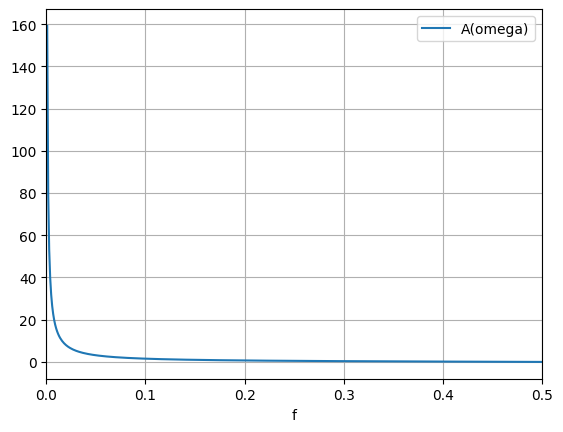

In [67]:
plot_func(A_trapezoid, label='A(omega)')
plt.grid()

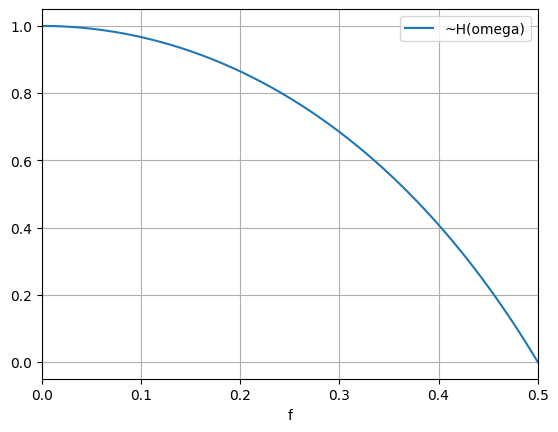

In [73]:
plot_func(A_trapezoid_relation, '~H(omega)')
plt.grid()

Из полученных графиков можно сделать вывод, что с увеличением частоты точность метода трапеций падает. При этом вычисленный результат становится меньше истинного значения интеграла

1.2 Выведем формулу передаточной функций рекурсивного фильтра, соответствующего формуле Симпсона.  
Формула Симпсона:
$$y_{n+1}=y_{n-1}+\frac{1}{3}[x_{n+1} + 4x_n + 4_{n-1}]$$
Выразим $y$ через передаточную функцию $A(\omega)$, возьмём $x_n = e^{i\omega t}$:
$$A(\omega) \cdot e^{i \omega (t+1)} = A(\omega) \cdot e^{i\omega (t-1)} + \frac{1}{3}(e^{i \omega (t+1)} + 4e^{i\omega t} + e^{i \omega (t-1)})$$
Получим:
$$A(\omega) = \frac{1}{3}\frac{(e^{i \omega (t+1)} + 4e^{i\omega t} + e^{i \omega (t-1)})}{e^{i\omega (t+1)} - e^{i\omega (t-1)}} = \frac{cos(\omega) + 2}{3isin(\omega)}$$
Отношение вычисленного значения к истинному равно:
$$A(\omega) \cdot i \omega = \frac{\omega(cos(\omega) + 2)}{3sin(\omega)}$$

In [75]:
# Симпсон
def A_simpson(omega):
    return (np.cos(omega) + 2) / (3 * 1j * np.sin(omega))
def A_simpson_relation(omega):
    return A_simpson(omega) * 1j * omega

Построим графики для передаточной функции $A(\omega)$ и отношения вычисленного значения к истинному $\tilde{H}(\omega)$ :

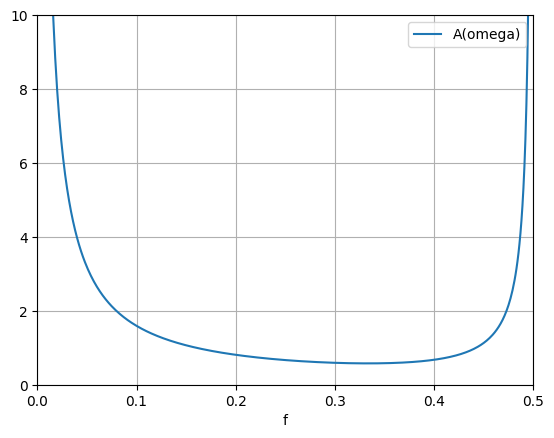

In [76]:
plot_func(A_simpson, label='A(omega)')
plt.ylim(0, 10)
plt.grid()

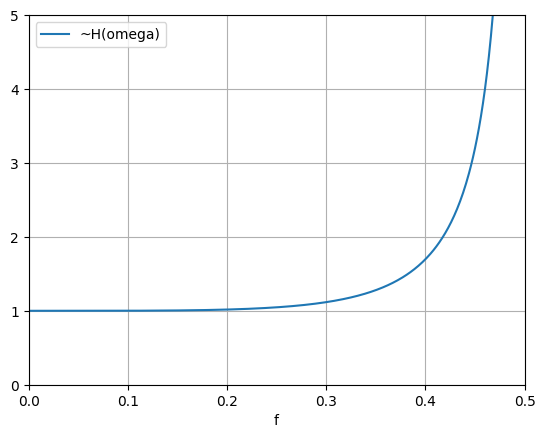

In [78]:
plot_func(A_simpson_relation,'~H(omega)')
plt.ylim(0, 5)
plt.grid()

Из полученных графиков можно сделать вывод, что на высоких частотах точность формулы Симпсона резко падает. При этом вычисленный результат становится много больше истинного значения интеграла

1.3. Выведем формулу передаточной функций рекурсивного фильтра, соответствующего формуле правых прямоугольников.  
Рекурсивная формула для метода правых прямоугольников:
$$y_{n+1}=y_n+x_{n+1}$$
Выразим $y$ через передаточную функцию $A(\omega)$, возьмём $x_n = e^{i\omega t}$:
$$A(\omega) \cdot e^{i \omega (t+1)} = A(\omega) \cdot e^{i\omega t} + e^{i \omega t}$$
Получим:
$$A(\omega) = \frac{1}{e^{i \omega} - 1} = \frac{1}{cos(\omega) + isin(\omega) - 1}$$
Отношение вычисленного значения к истинному равно:
$$A(\omega) \cdot i \omega = \frac{i \omega}{cos(\omega) + isin(\omega) - 1}$$

In [47]:
# Прямоугольники
def A_rect(omega):
    return 1 / (np.cos(omega) + 1j * np.sin(omega) - 1)
def A_rect_relation(omega):
    return A_rect(omega) * 1j * omega

Построим графики для передаточной функции $A(\omega)$ и отношения вычисленного значения к истинному $\tilde{H}(\omega)$ :

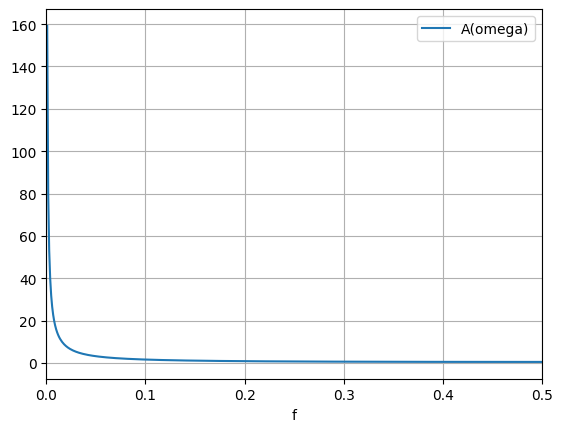

In [48]:
plot_func(A_rect, label='A(omega)')
plt.grid()

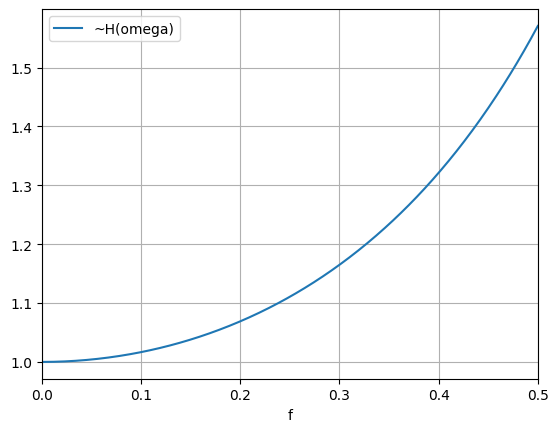

In [79]:
plot_func(A_rect_relation, '~H(omega)')
plt.grid()

Из полученных графиков можно сделать вывод, что с увеличением частоты точность метода прямоугольников падает. При этом вычисленный результат становится больше истинного значения интеграла

2. Выведем формулы передаточной функции рекурсивного фильтра для интегрирования «по правилу 3/8»:

Рекурсивная формула для интегрирования «по правилу 3/8»:
$$y_{n+2} = y_{n-1} + \frac{3}{8}(x_{n+2} + 3x_{n+1} + 3x_n + x_{n-1})$$
Выразим $y$ через передаточную функцию $A(\omega)$, возьмём $x_n = e^{i\omega t}$:  

$$A(\omega) \cdot e^{i \omega (t+2)} = A(\omega) \cdot e^{i\omega (t-1)} + \frac{3}{8}(e^{i\omega (t+2)} + 3e^{i\omega(t+1)} + 3e^{i\omega t} + e^{i\omega (t-1)})$$
Получим:
$$A(\omega) = \frac{3}{8} \frac{(e^{i\omega (t+2)} + 3e^{i\omega(t+1)} + 3e^{i\omega t} + e^{i\omega (t-1)})}{e^{i\omega(t+2)} - e^{i\omega (t-1)}} = \frac{3cos^3(\omega/2)}{2i sin(3\omega/2)}$$
Отношение вычисленного значения к истинному равно:
$$A(\omega) \cdot i \omega =  \frac{3cos^3(\omega/2) \cdot \omega}{2 sin(3\omega/2)}$$

In [80]:
def A_rule_3_8(omega):
    return np.cos(omega / 2) ** 3 * 3 / (2 * 1j * np.sin(3 * omega / 2))
def A_rule_3_8_relation(omega):
    return A_rule_3_8(omega) * 1j * omega

Построим графики для передаточной функции $A(\omega)$ и отношения вычисленного значения к истинному $\tilde{H}(\omega)$ :

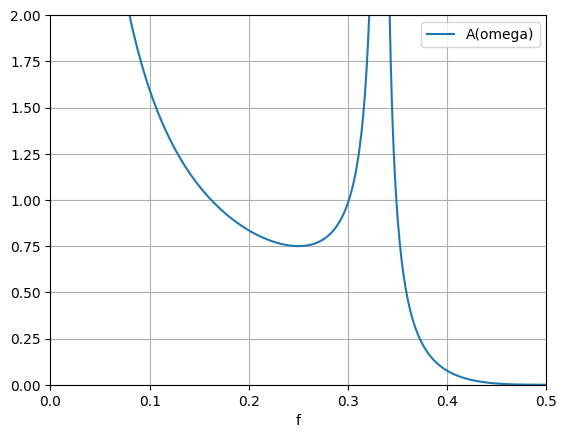

In [51]:
plot_func(A_rule_3_8, label='A(omega)')
plt.ylim(0, 2)
plt.grid()

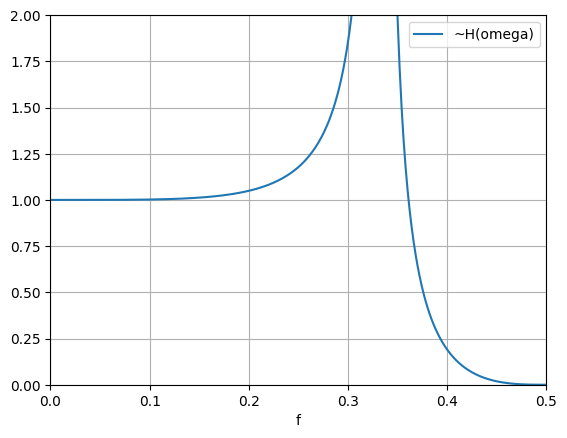

In [83]:
plot_func(A_rule_3_8_relation, '~H(omega)')
plt.ylim(0, 2)
plt.grid()

Из полученных графиков можно сделать вывод, что с увеличением частоты точность интегрирования "по правилу 3/8" падает. При этом при средних частотах (около 1/3 Гц) вычисленный результат становится много больше истинного значения интеграла. При увеличении частоты выше 1/3 Гц результат интегрирования стремительно уменьшается относительно истинного значения интеграла

3. Проведём сопоставительный анализ частотных характеристик, полученных в п. 1 и 2.   
Построим графики отношения вычисляемого в результате фильтрации значения к истинному.

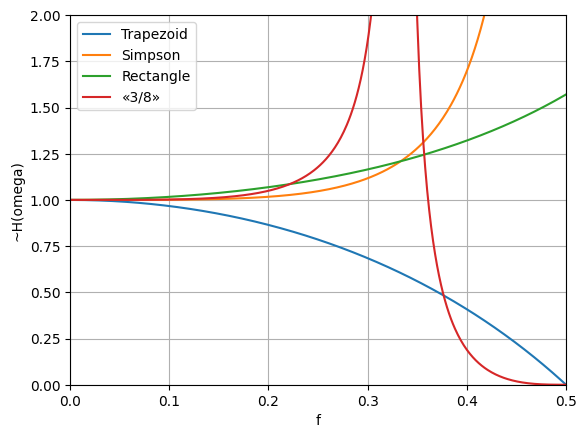

In [86]:
plot_func(A_trapezoid_relation, label='Trapezoid')
plot_func(A_simpson_relation, label='Simpson')
plot_func(A_rect_relation, label='Rectangle')
plot_func(A_rule_3_8_relation, label='«3/8»')
plt.ylim(0, 2,5)
plt.ylabel('~H(omega)')
plt.grid()

Из полученного графика можно сделать следующие выводы:
1. Формула Симпсона даёт наиболее точный результат из всех формул при условии, что в сигнале отсутствуют высокие частоты. При наличии в сигнале высоких частот (прим. высокочастнотные шумы) формула Симпсона даёт неточный результат.  

2. Интегрирование по "правилу 3/8" даёт сравнительно точный результат для низких частот, при этом сигналы с высокими частотами почти не учитываются в результате. Но сигналы с частотой вблизи 2/3 от частоты Найквиста (или 1/3 от частоты дискретизации) сильно искажают результат интегрирования 

3. Формулы трапеций и прямоугольников дают менее точный результат для низких частот, чем формула Симпсона или "правило 3/8". Но высокочастотные сигналы не так сильно влияют на результат интегрирования, как при использовании формулы Симпсона. Сигналы с частотой вблизи 2/3 от частоты Найквиста (или 1/3 от частоты дискретизации) не так сильно влияют на результат интегрирования, как при использовании "правила 3/8".

## Выводы

В ходе выполнения был проведён вывод частотных характеристик известных формул численного интегрирования. Полученные частотные характеристики были смоделированы. Был проведён сравнительный анализ частотных характеристик 